In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import models,layers
from emnist import list_datasets,extract_test_samples,extract_training_samples
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Input, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical

list_datasets()

x_train, y_train = extract_training_samples('balanced')
x_test, y_test = extract_test_samples('balanced')

In [2]:
# Verileri normalize et
x_train = x_train.squeeze()
x_train = x_train.astype('float32') / 255
x_test= x_test.squeeze()
x_test = x_test.astype('float32') / 255

num_classes = 47

# Etiketleri kategorik hale getir
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

x_train = np.array(x_train)
x_test = np.array(x_test)

In [3]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [5]:
# cnn Modeli oluşturma
cnn_model = Sequential()
cnn_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Dense(32, activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Dense(16, activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Dense(47, activation='softmax'))

opt=Adam(learning_rate=0.001)

cnn_model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_4 (Dense)             (None, 64)               

In [6]:
history = cnn_model.fit(x_train,y_train, epochs=50, batch_size=32 ,validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/50


3525/3525 [==============================] - 65s 17ms/step - loss: 1.0045 - accuracy: 0.7176 - val_loss: 0.7529 - val_accuracy: 0.7606
Epoch 2/50
3525/3525 [==============================] - 64s 18ms/step - loss: 0.5089 - accuracy: 0.8287 - val_loss: 0.4793 - val_accuracy: 0.8371
Epoch 3/50
3525/3525 [==============================] - 47s 13ms/step - loss: 0.4477 - accuracy: 0.8462 - val_loss: 0.4460 - val_accuracy: 0.8495
Epoch 4/50
3525/3525 [==============================] - 51s 15ms/step - loss: 0.4141 - accuracy: 0.8559 - val_loss: 0.4074 - val_accuracy: 0.8598
Epoch 5/50
3525/3525 [==============================] - 59s 17ms/step - loss: 0.3922 - accuracy: 0.8607 - val_loss: 0.4246 - val_accuracy: 0.8548
Epoch 6/50
3525/3525 [==============================] - 60s 17ms/step - loss: 0.3747 - accuracy: 0.8669 - val_loss: 0.3855 - val_accuracy: 0.8688
Epoch 7/50
3525/3525 [==============================] - 57s 16ms/step - loss: 0.3624 - accuracy: 0.8695 - val_loss: 0.4089

In [7]:
# Modeli test et
test_loss, test_acc = cnn_model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

588/588 [==============================] - 3s 6ms/step - loss: 0.3666 - accuracy: 0.8734
Test accuracy: 0.8734042644500732


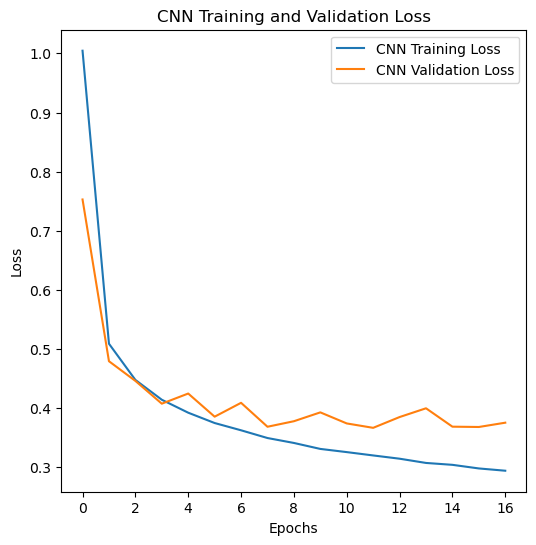

In [15]:
# Eğitim ve Doğrulama Kayıplarını Çizme
plt.figure(figsize=(6, 6))

# FNN Eğitim ve Doğrulama Kayıpları
plt.plot(history.history['loss'], label='CNN Training Loss')
plt.plot(history.history['val_loss'], label='CNN Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('CNN Training and Validation Loss')
plt.legend()

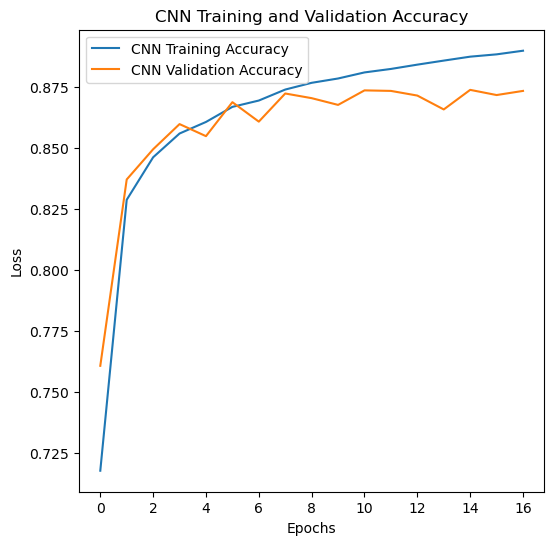

In [14]:
# Eğitim ve Doğrulama Accuracy Çizme
plt.figure(figsize=(6, 6))

# FCNN Eğitim ve Doğrulama Doğruluğu

plt.plot(history.history['accuracy'], label='CNN Training Accuracy')
plt.plot(history.history['val_accuracy'], label='CNN Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('CNN Training and Validation Accuracy')
plt.legend()